Importing Libraries and Loading Data

In [1]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


Data Preparation

In this cell, we create a DataFrame from the dataset's data and feature names, add a 'target' column to indicate the target labels (0: malignant, 1: benign)

In [2]:
# Create a DataFrame from the dataset's data and feature names
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add a 'target' column to the DataFrame
df["target"] = cancer.target

# Display the first few rows of the DataFrame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Splitting

In [3]:
# Split the data into training and testing sets
X = df.drop(columns=["target"])
y = df["target"]

# Specify the test size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")


Train: (455, 30)
Test: (114, 30)


Model Training and Evaluation

In [4]:
# Create a Decision Tree Classifier model and train it
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate and print the training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 0.93


Confusion Matrix

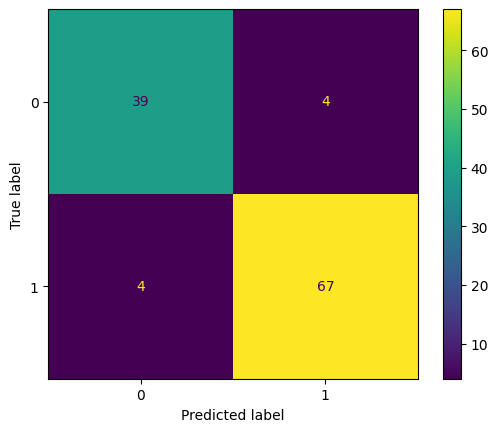

In [5]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()




Feature Importance

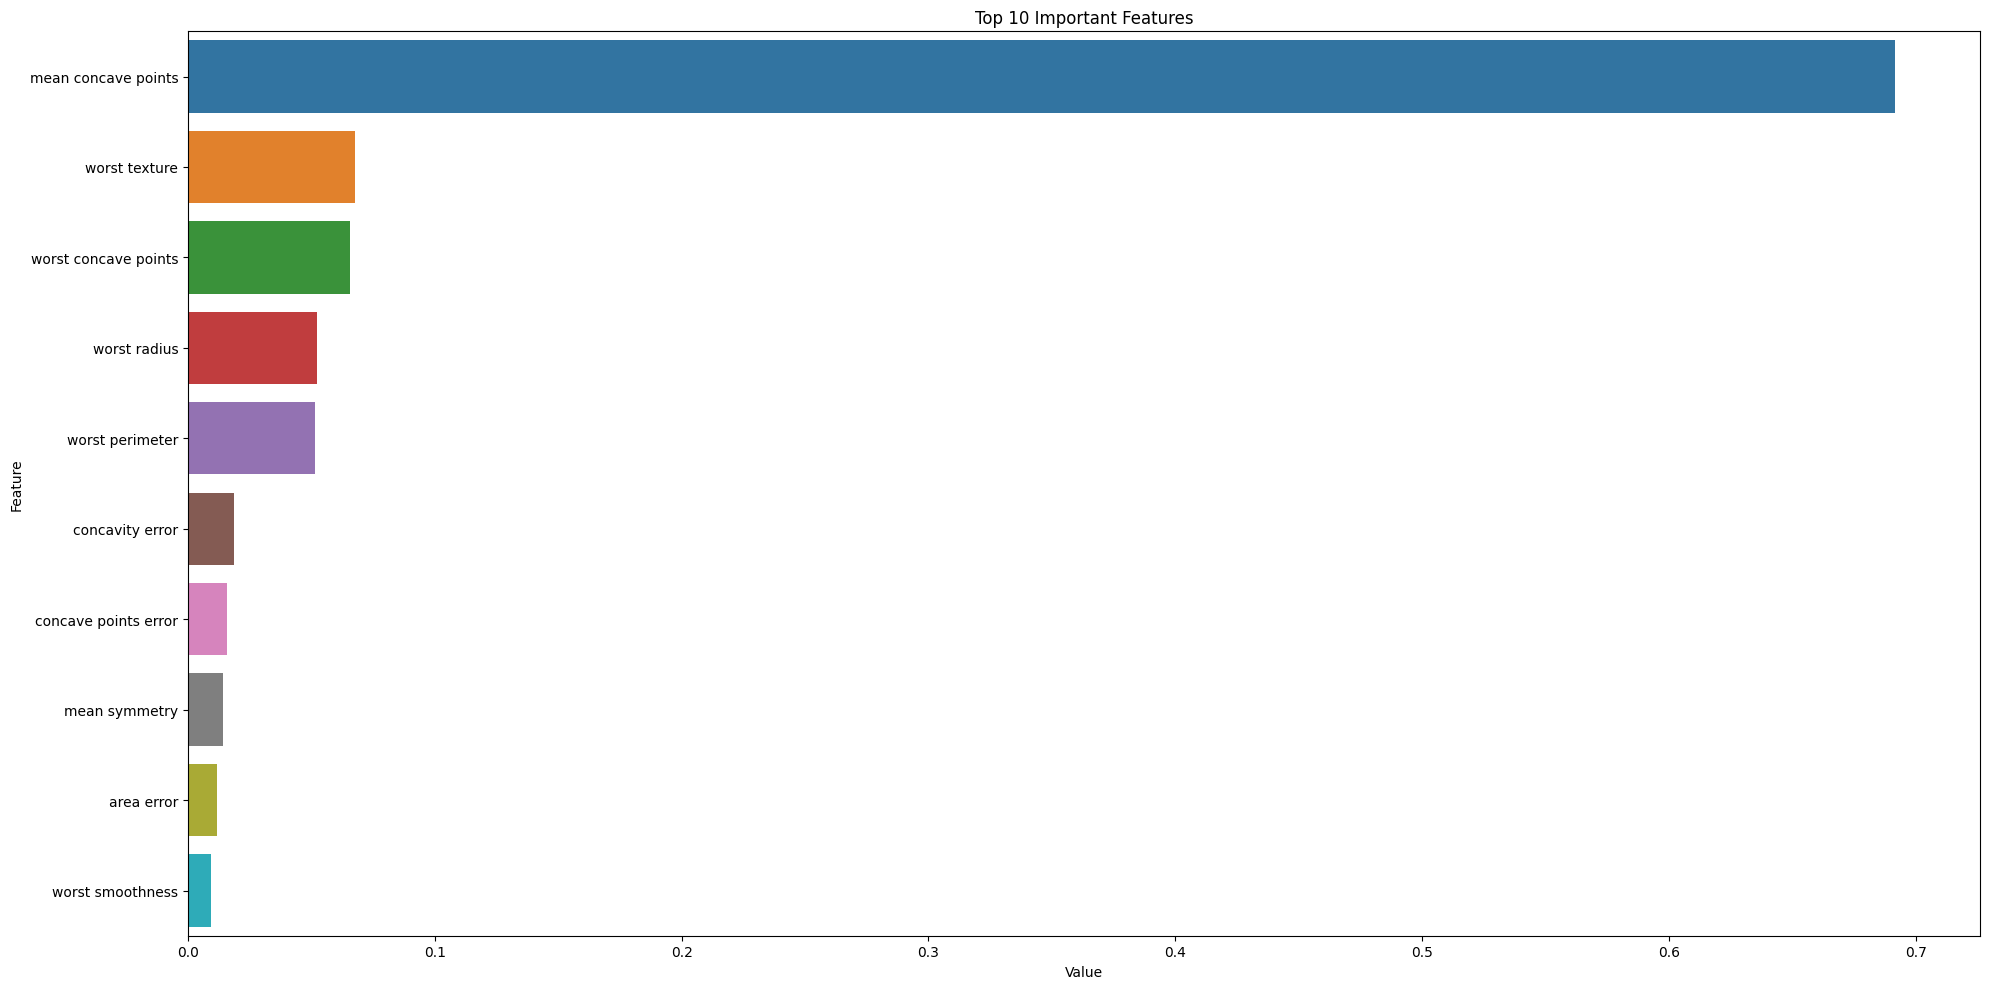

In [6]:
# Get feature importances and create a DataFrame
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns)),
                           columns=['Value','Feature'])

# Plot the top 10 important features
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

Visualization of Decision Tree

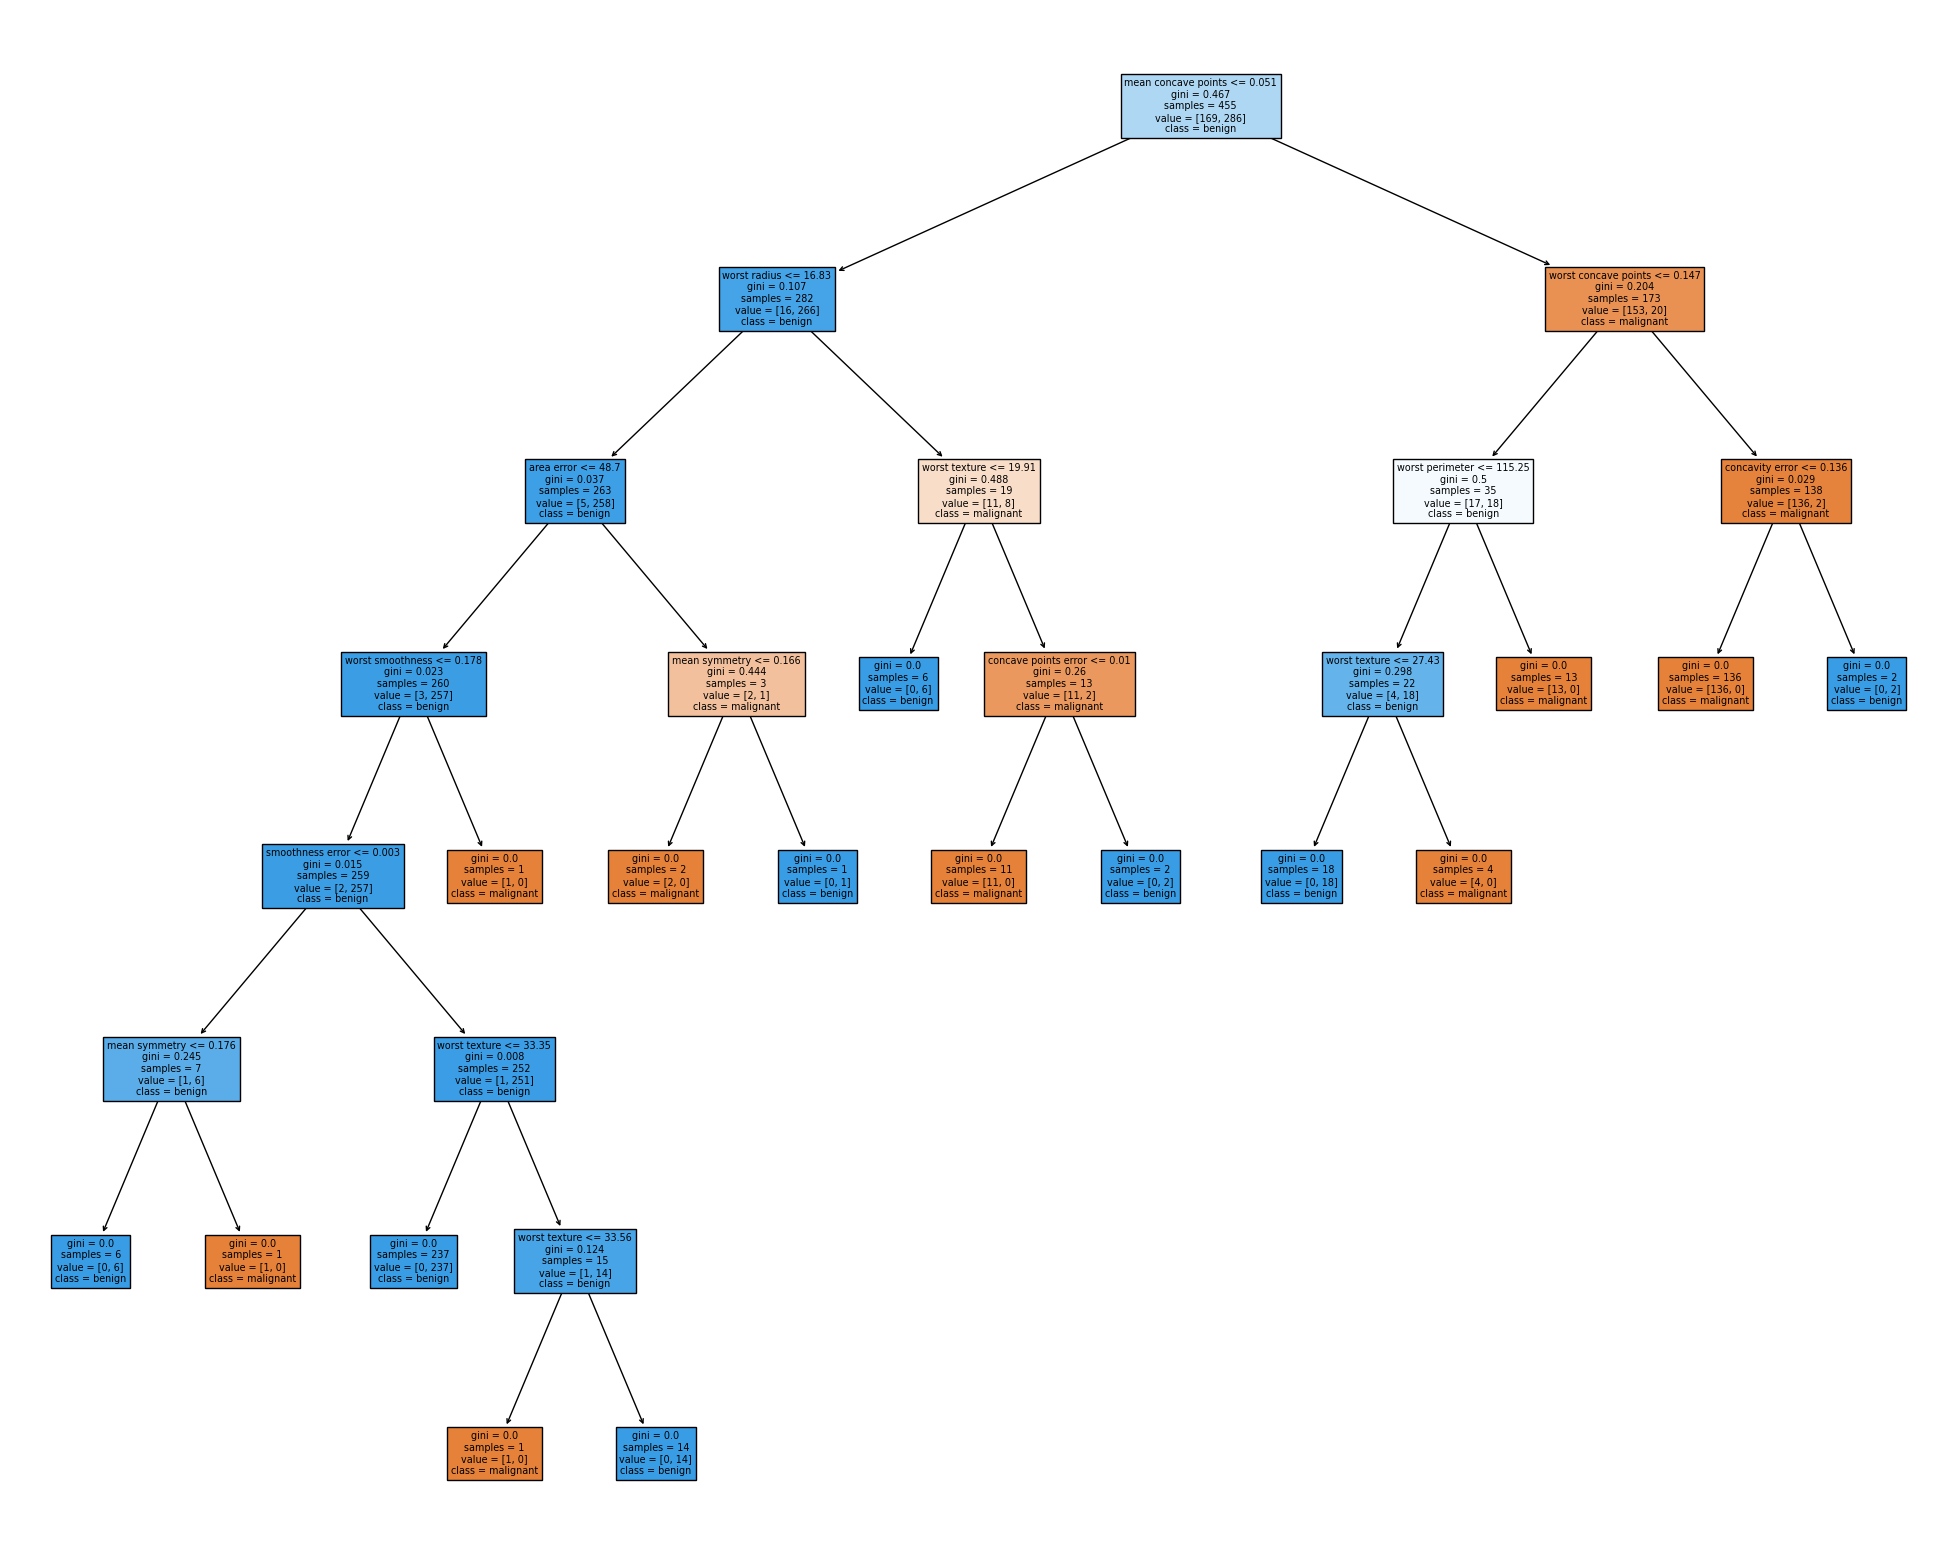

In [7]:
# Plot the Decision Tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model,
                   feature_names=cancer.feature_names,
                   class_names=cancer.target_names,
                   filled=True)
